In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
df=pd.read_csv("customer_churn_dataset.csv")

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [8]:
x=df[["Last Interaction","Age","Payment Delay","Gender","Usage Frequency"]]

In [9]:
x

,Last Interaction,Age,Payment Delay,Gender,Usage Frequency
0,9,22,27,Female,14
1,20,41,13,Female,28
2,21,47,29,Male,10
3,18,35,17,Male,12
4,18,53,2,Female,24
...,...,...,...,...,...
64369,14,45,21,Female,12
64370,9,37,22,Male,1
64371,20,25,30,Male,14
64372,13,50,22,Female,19


In [10]:
y=df.Churn

In [11]:
y

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

<Axes: >

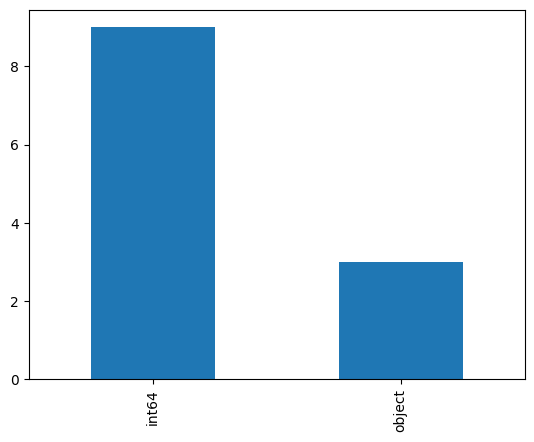

In [12]:
df.dtypes.value_counts().plot.bar()

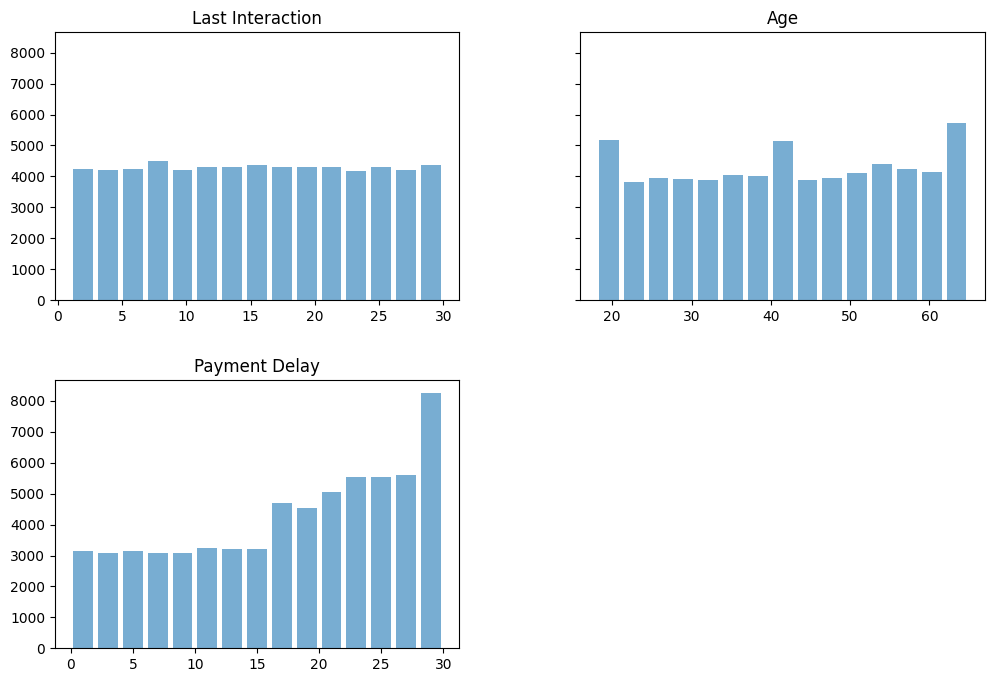

In [13]:
x[["Last Interaction","Age","Payment Delay","Gender"]].hist(bins=15,figsize=(12,8),alpha=0.6,grid=False,rwidth=0.8,sharey=True)
plt.show()

<Axes: xlabel='Gender'>

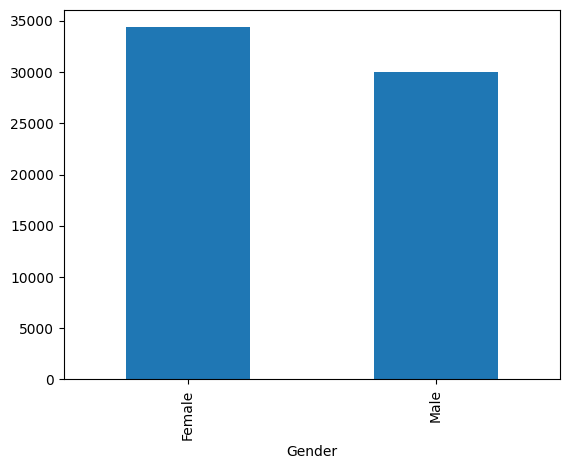

In [14]:
df['Gender'].value_counts().plot.bar()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
gen=le.fit_transform(x.Gender)

In [19]:
x["Sex"]=gen

In [20]:
x.drop("Gender",axis=1,inplace=True)

In [21]:
x

,Last Interaction,Age,Payment Delay,Usage Frequency,Sex
0,9,22,27,14,0
1,20,41,13,28,0
2,21,47,29,10,1
3,18,35,17,12,1
4,18,53,2,24,0
...,...,...,...,...,...
64369,14,45,21,12,0
64370,9,37,22,1,1
64371,20,25,30,14,1
64372,13,50,22,19,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
x

,Last Interaction,Age,Payment Delay,Usage Frequency,Sex
0,9,22,27,14,0
1,20,41,13,28,0
2,21,47,29,10,1
3,18,35,17,12,1
4,18,53,2,24,0
...,...,...,...,...,...
64369,14,45,21,12,0
64370,9,37,22,1,1
64371,20,25,30,14,1
64372,13,50,22,19,0


In [25]:
len(train_x)

45061

In [26]:
len(test_x)

19313

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [29]:
model.fit(train_x,train_y)

LogisticRegression()

In [30]:
model.score(test_x,test_y)

0.7669445451250453

In [31]:
y_pred=model.predict(test_x)

In [32]:
def results(y_pred):
    results = {}
    results['accuracy'] = accuracy_score(test_y, y_pred)
    results['precision'] = precision_score(test_y, y_pred)
    results['recall'] = recall_score(test_y, y_pred)
    results['f1_score'] = f1_score(test_y, y_pred)
    results['roc_auc_score'] = roc_auc_score(test_y, y_pred)
    return results

In [33]:
results(y_pred)

{'accuracy': 0.7669445451250453,
 'precision': 0.7490947816826411,
 'recall': 0.7663144133347859,
 'f1_score': 0.757606763961441,
 'roc_auc_score': 0.7669148541905821}

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model=DecisionTreeClassifier()

In [36]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [37]:
model.score(test_x,test_y)

0.7579350696422099

In [38]:
y_pred=model.predict(test_x)

In [ ]:
def results(y_pred):
    results = {}
    results['accuracy'] = accuracy_score(test_y, y_pred)
    results['precision'] = precision_score(test_y, y_pred)
    results['recall'] = recall_score(test_y, y_pred)
    results['f1_score'] = f1_score(test_y, y_pred)
    results['roc_auc_score'] = roc_auc_score(test_y, y_pred)
    return results

In [39]:
results(y_pred)

{'accuracy': 0.7579350696422099,
 'precision': 0.7526363024455912,
 'recall': 0.7309075062642989,
 'f1_score': 0.7416127784225943,
 'roc_auc_score': 0.7566615684074603}

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model=KNeighborsClassifier()

In [42]:
model.fit(train_x,train_y)

KNeighborsClassifier()

In [43]:
model.score(test_x,test_y)

0.7823227877595402

In [44]:
model.predict(test_x)

array([0, 0, 0, ..., 0, 1, 1])

In [45]:
model=KNeighborsClassifier(n_neighbors=100)

In [46]:
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=100)

In [47]:
model.score(test_x,test_y)

0.805416041008647

In [48]:
y_pred=model.predict(test_x)

In [49]:
def results(y_pred):
    results = {}
    results['accuracy'] = accuracy_score(test_y, y_pred)
    results['precision'] = precision_score(test_y, y_pred)
    results['recall'] = recall_score(test_y, y_pred)
    results['f1_score'] = f1_score(test_y, y_pred)
    results['roc_auc_score'] = roc_auc_score(test_y, y_pred)
    return results

In [50]:
results(y_pred)

{'accuracy': 0.805416041008647,
 'precision': 0.7407835124811228,
 'recall': 0.9084867632639722,
 'f1_score': 0.8161088275592092,
 'roc_auc_score': 0.8102725902366832}

<Axes: >

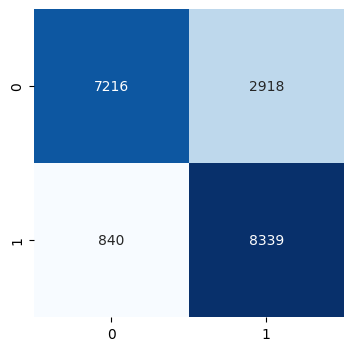

In [51]:
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=None)